선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 선형 모델

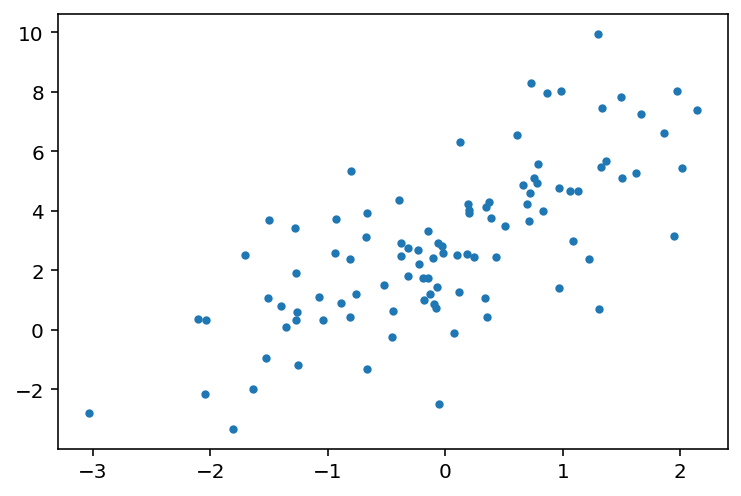

In [24]:
n_samples = 100
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

In [25]:
np.corrcoef(x,y)

array([[1.        , 0.71854093],
       [0.71854093, 1.        ]])

## 선형회귀 모델 사용
- sklearn이 제공하는 LinearRegression 사용

In [21]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[2.1668388]
3.3226255236558493


## 회귀직선

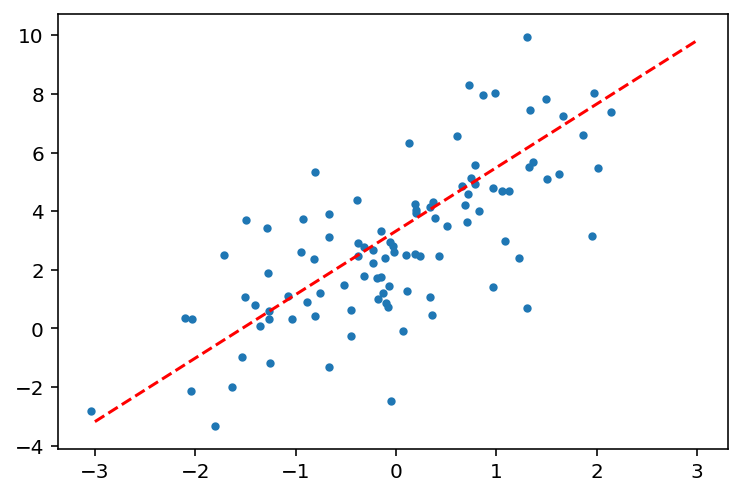

In [26]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 10)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

# 경사하강법 (최적화기) - 학습 알고리즘

In [27]:
num_epoch = 10
lr = 1.0

w = np.random.rand()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w*x + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w = {w:.6f}, b = {b:.6f} , error = {error:.4f}")

    w = w - lr*((y_pred - y)* x).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w = 0.390726, b = 0.868395 , error = 2.4685
 1 w = 1.963842, b = 2.890440 , error = 1.3854
 2 w = 1.758467, b = 2.897910 , error = 1.3945
 3 w = 1.786568, b = 2.896935 , error = 1.3920
 4 w = 1.782723, b = 2.897068 , error = 1.3923
 5 w = 1.783249, b = 2.897050 , error = 1.3923
 6 w = 1.783177, b = 2.897053 , error = 1.3923
 7 w = 1.783187, b = 2.897052 , error = 1.3923
 8 w = 1.783186, b = 2.897052 , error = 1.3923
 9 w = 1.783186, b = 2.897052 , error = 1.3923


## 입력 변수가 2개일 때

In [29]:
n_samples = 100
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

num_epoch = 10
lr = 0.7

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

[2.12988794 3.02990595]
4.201696318079421
 0 w1 = 0.340189,  w2 = 0.849362, b = 0.587305 , error = 3.739024
 1 w1 = 0.949693,  w2 = 2.696125, b = 3.071055 , error = 1.393369
 2 w1 = 1.527528,  w2 = 3.001339, b = 3.747323 , error = 0.957693
 3 w1 = 1.840483,  w2 = 3.042850, b = 3.995728 , error = 0.824776
 4 w1 = 1.992954,  w2 = 3.042125, b = 4.104395 , error = 0.799591
 5 w1 = 2.065261,  w2 = 3.037263, b = 4.155237 , error = 0.797620
 6 w1 = 2.099361,  w2 = 3.033834, b = 4.179486 , error = 0.798009
 7 w1 = 2.115448,  w2 = 3.031899, b = 4.191091 , error = 0.798481
 8 w1 = 2.123049,  w2 = 3.030892, b = 4.196640 , error = 0.798744
 9 w1 = 2.126646,  w2 = 3.030386, b = 4.199288 , error = 0.798867


## 남여 키-몸무게-성별 예측

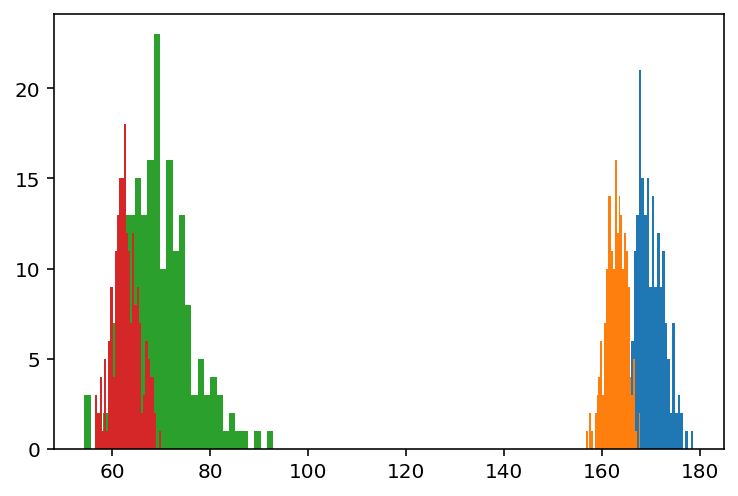

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [31]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.7355206249935269

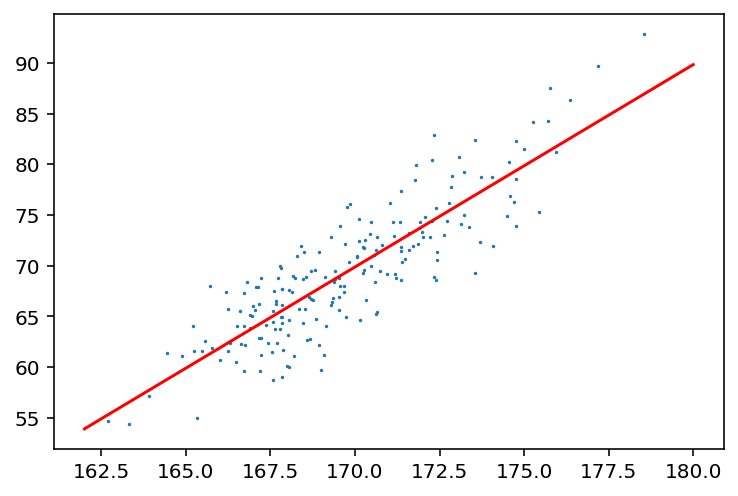

In [32]:
xs = np.linspace(162,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [33]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.6564340692795422

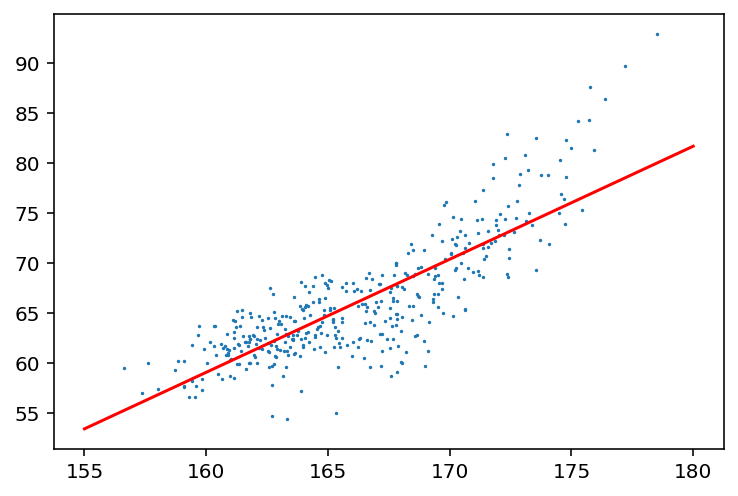

In [34]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [35]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X[:10]

,height,sex
0,172.879644,0
1,175.432176,0
2,170.481374,0
3,170.336438,0
4,175.249907,0
5,169.364595,0
6,169.678578,0
7,169.302521,0
8,173.558660,0
9,169.131631,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.7095153459085246

## 성별을 고려하여 성능이 개선됨

In [37]:
print(leg.coef_)
print(leg.intercept_)

[1.68499941 5.48097392]
-216.84674812678716


## 남,여 각각의 회귀 직선

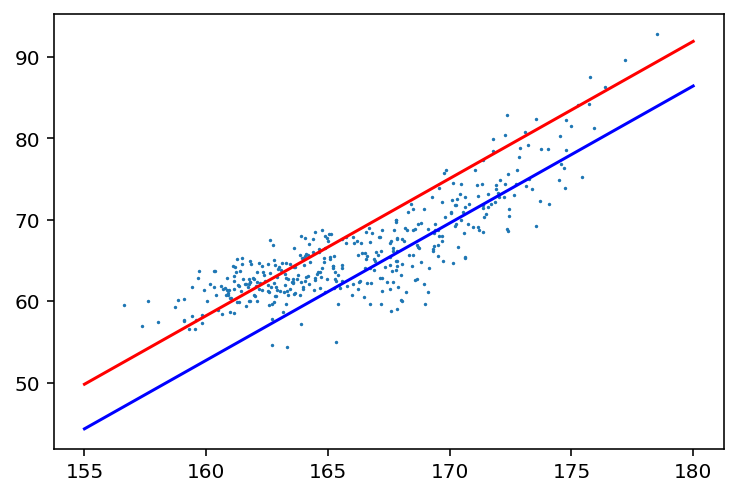

In [38]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류
- 키와 몸무게로 성별 분류

In [39]:
X["weight"] = y
X[:10]

,height,sex,weight
0,172.879644,0,78.837539
1,175.432176,0,75.296424
2,170.481374,0,74.351951
3,170.336438,0,66.626792
4,175.249907,0,84.144079
5,169.364595,0,68.416482
6,169.678578,0,67.358610
7,169.302521,0,66.122442
8,173.558660,0,82.435294
9,169.131631,0,64.093686


In [41]:
y = X["sex"] ; y[:5]

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [42]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,172.879644,78.837539
1,175.432176,75.296424
2,170.481374,74.351951
3,170.336438,66.626792
4,175.249907,84.144079


In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)
clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9625

In [44]:
y_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [46]:
confusion_matrix(y_test, y_pred)

array([[38,  3],
       [ 0, 39]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.93      1.00      0.96        39

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [48]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [49]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

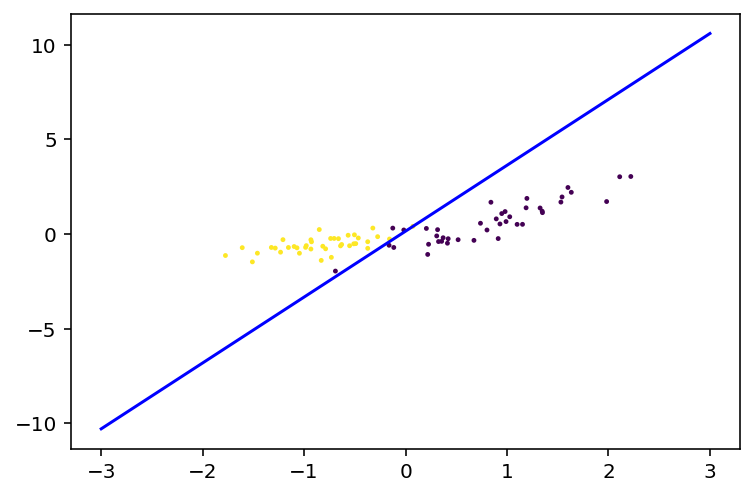

In [50]:
xs = np.linspace(-3,3,3)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

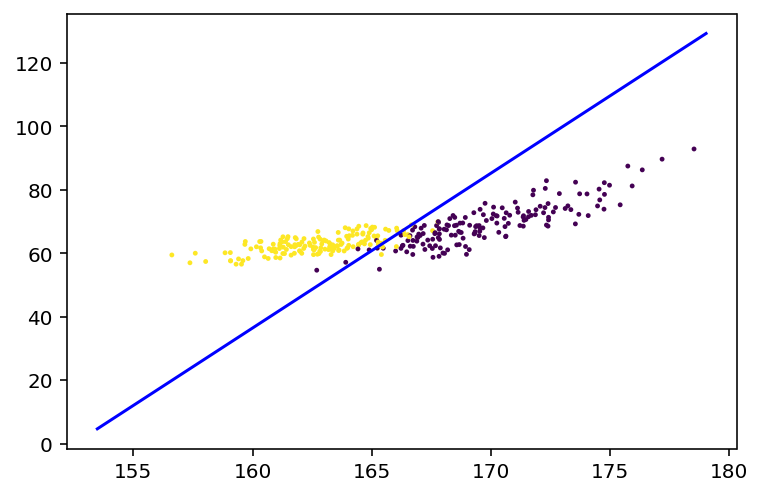

In [51]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [52]:
scores = clf.decision_function(X_test)

In [53]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

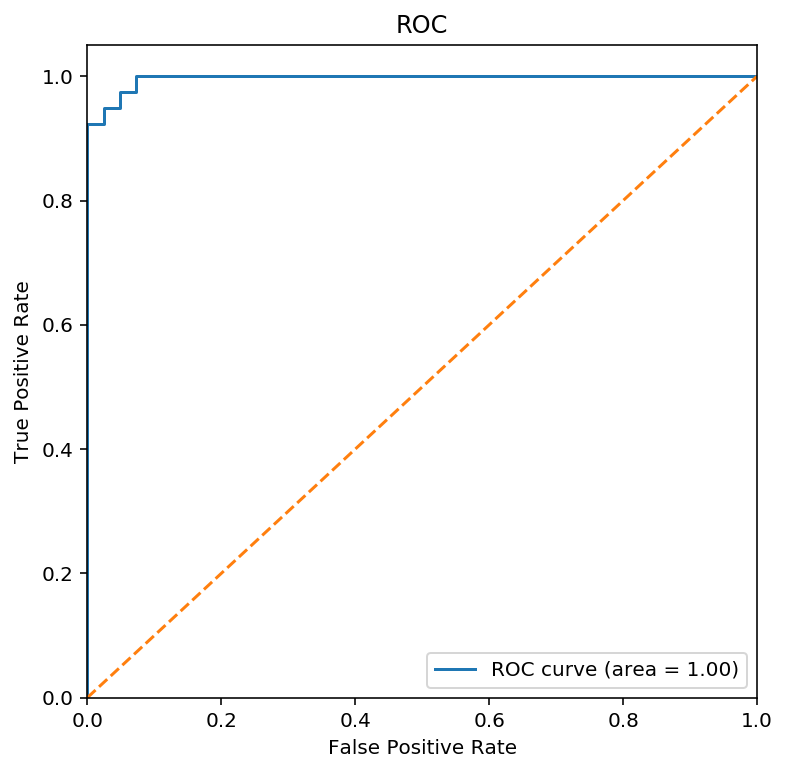

In [54]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## 랜덤포레스트를 사용하는 경우

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375

## ROC 성능 비교

In [56]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


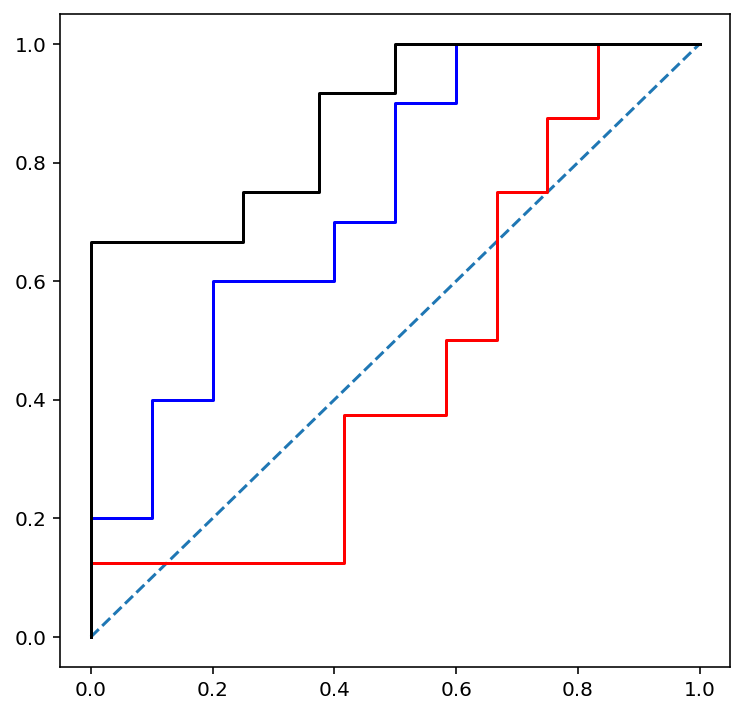

In [57]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])